In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Generamos los datos
instancias = 800
# Presión arterial
min_pa = 70
max_pa = 180
umbral_pa = [100, 120]
min_cl = 120
max_cl = 250
umbral_cl = [180]
min_pm = 0
max_pm = 10000
umbral_pm = [9000]
pa = np.random.uniform(min_pa,max_pa, instancias)
cl = np.random.uniform(min_cl,max_cl, instancias)
pm = np.random.uniform(min_pm, max_pm, instancias)
peso_pa = 7
peso_cl = 5
peso_pm = 2
# El riesgo añadido será 0 hasta sobrepasar el umbral
data = pd.DataFrame({'Presión Arterial': pa, 'Colesterol': cl, 'Poder Mágico': pm})

Supongamos que el riesgo es lineal una vez pasan los umbrales correspondientes

In [67]:
def fun_risk_cl(cls, umbral_cl, min_cl, max_cl):
    risk = np.zeros_like(cls)
    for i, cl  in enumerate(cls):
        if cl < umbral_cl[0]:
            risk[i] = 0
        else:
            risk[i] = (cl - umbral_cl[0]) / (max_cl - umbral_cl[0])
    return risk

def fun_risk_pa(pas, umbral_pa, min_pa, max_pa):
    risk = np.zeros_like(pas)
    for i, pa in enumerate(pas):
        if pa < umbral_pa[0]:
            risk[i] = (umbral_pa[0] - pa) / (umbral_pa[0] - min_pa)
        elif umbral_pa[1] < pa:
            risk[i] = (pa - umbral_pa[1]) / (max_pa - umbral_pa[1])
        else:
            risk[i] = 0    
    return risk
# Si tienes suficiente poder mágico eres inmune
def fun_risk_pm(pms, umbral_pm, min_pm, max_pm):
    risk = np.zeros_like(pms)
    for i, pm  in enumerate(pms):
        if pm > umbral_pm[0]:
            risk[i] = 0
        else:
            risk[i] = 1
    return risk

def fun_total_risk(risk_pa, risk_cl, risk_pm, peso_cl, peso_pa):
    return ((risk_pa * peso_pa + risk_cl * peso_cl)) / (peso_pa + peso_cl)

In [91]:
total_risk = fun_total_risk(fun_risk_cl(cl,umbral_cl, min_cl, max_cl),
           fun_risk_pa(pa, umbral_pa, min_pa, max_pa),
           fun_risk_pm(pm, umbral_pm, min_pm, max_pm),
           peso_cl, peso_pa)
te_toco = np.random.binomial(1, 1/100, instancias)
no_te_toco = np.random.binomial(1, 1/200, size=instancias)

def si_te_toco_te_toco(total_risk, te_toco, no_te_toco, umbral_riesgo):
    in_risk = np.zeros_like(total_risk)
    for i, risk in enumerate(total_risk):
        if te_toco[i] == 1:
            in_risk[i] = 1
        elif no_te_toco[i] == 1:
            in_risk[i] = 0
        else:
            in_risk[i] = total_risk[i] > umbral_riesgo
    return in_risk


<Axes: xlabel='Presión Arterial', ylabel='Colesterol'>

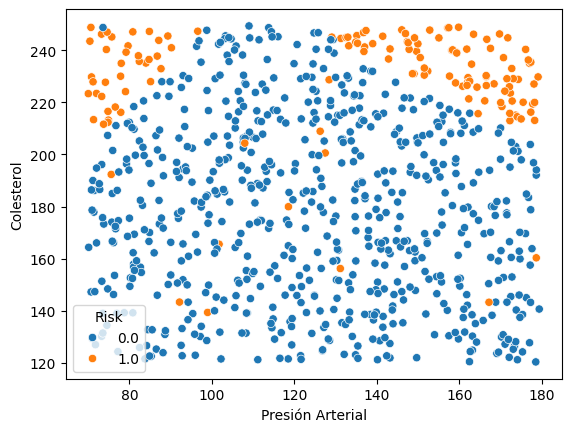

In [92]:
umbral_riesgo = 0.6
risk = si_te_toco_te_toco(total_risk, te_toco,no_te_toco, umbral_riesgo)
data['Risk'] = risk
sns.scatterplot(data, x='Presión Arterial', y = 'Colesterol', hue='Risk')